<a href="https://colab.research.google.com/github/MonikaGost/Winc/blob/master/Biggest_Co2_output_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

;What is the biggest predictor of a large CO2 output per capita of a country?

https://ourworldindata.org/co2-emissions


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **1. Production-CO2 per capita per country**

---



In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/co-emissions-per-capita.csv")

NameError: ignored

In [ ]:
#df1
df1.rename(columns= {"Annual CO₂ emissions (per capita)":"Annual CO₂"}, inplace=True)
df1.drop(columns = "Code", inplace=True)
df1.isnull().sum() # Looks there are no default missing values
df1.set_index("Entity",inplace=True) # setting country names as index

In [ ]:
uv = df1.index.unique()
display(len(uv)) # we have 237 unique 'country' names
display(list(uv)) # not all of these values are actual cuntries, so i remove them from the list

In [ ]:
no_countries = ["Africa","Asia","Asia (excl. China and India)",'Europe','Europe (excl. EU-27)',
'Europe (excl. EU-28)','European Union (27)','European Union (28)','High-income countries','Low-income countries',
'Lower-middle-income countries','North America','North America (excl. USA)','Oceania','South America','Upper-middle-income countries','World']
df1.drop(index=no_countries,axis=0,inplace=True)
 # we have 220 countries left

In [ ]:
df1

In [ ]:
co2_capita_2021 = df1.loc[df1["Year"]==2021]
co2_capita_2021.sort_values(by="Annual CO₂",inplace=True, ascending=False)
df1_top_20 = co2_capita_2021.head(20)
df1_bottom_20 = co2_capita_2021.tail(20)
display(df1_top_20)
display(df1_bottom_20)

In [ ]:
fig, ax = plt.subplots()

x = df1_top_20.index
y = df1_top_20["Annual CO₂"]

ax.bar(x, y, color="red")

plt.xlabel("Country")
plt.ylabel("Annual Co2 per capita")
plt.title("Top 20 Co2 per capita per country")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()


In [ ]:
df1_bottom_20.sort_values(by="Annual CO₂",inplace=True, ascending=True)
fig, ax = plt.subplots()
x2 = df1_bottom_20.index
y2 = df1_bottom_20["Annual CO₂"]

ax.bar(x2, y2)

plt.xlabel("Country")
plt.ylabel("Annual Co2 per capita")
plt.title("Countries with lowest Co2 output per capita in 2020")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()

### **2. Looking at consumption-CO2 per capita of a country**

**Inspecting and cleaning up data set**

---



In [ ]:
df3 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/consumption-co2-per-capita.csv")

In [ ]:
df3.rename(columns= {"Annual consumption-based CO₂ emissions (per capita)":"Annual CO₂"}, inplace=True)
df3.drop(columns = "Code", inplace=True)
df3.set_index("Entity",inplace=True)

NameError: ignored

In [ ]:
df3_unique = df3.index.unique()
display(len(df3_unique)) # we have 137 unique 'country' names but some of them aren't countries, I remove these rows in next step
display(list(df3_unique)) # we have 120 countries left

In [ ]:
df3_drop = ['Asia','Asia (excl. China and India)','Africa','Europe','Europe (excl. EU-27)','Europe (excl. EU-28)','European Union (27)',
            'European Union (28)','High-income countries','Low-income countries','Lower-middle-income countries','North America',
            'North America (excl. USA)','Oceania','South America','Upper-middle-income countries','World']
df3.drop( index = df3_drop, axis=0, inplace=True)

In [ ]:
consumption_capita = pd.pivot_table(df3, values="Annual CO₂", index=["Entity"], columns=["Year"])
consumption_capita

In [ ]:
consumption_capita#.isnull().sum()
consumption_capita.sort_values(by=2020, ascending=False, inplace=True)

In [ ]:
consumption2020 = consumption_capita.loc[:,2020]
cons_co2= consumption2020.head(20)
consumption2020

In [ ]:
fig, ax = plt.subplots()
x4 = cons_co2.index
y4 = cons_co2.values

ax.bar(x4, y4)

plt.xlabel("Country name")
plt.ylabel("Annual CO2 output per capita in tons")
plt.title("Top 20 countries with highest consumption-based CO2 per capita in 2020")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()

### **3. Population data per country**

---



In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/population-and-demography.csv")

In [ ]:
#display(df2)
population = df2.loc[:,"Country name":"Population"]

population.set_index("Country name",inplace=True)
population.sort_values(by="Population", ascending=False, inplace=True)
#display(population)

unique_population = population.index.unique()
display(len(unique_population)) # we have 254 unique 'country' names
display(list(unique_population)) # There are some "no countries" on the list, I remove them in next step.

In [ ]:
df2_drop = ['World','Less developed regions','Less developed regions, excluding least developed countries','Less developed regions, excluding China',
            'Asia (UN)','Lower-middle-income countries','Upper-middle-income countries','Africa (UN)','More developed regions','High-income countries',
            'Least developed countries','Europe (UN)','Low-income countries','Latin America and the Caribbean (UN)','Land-locked developing countries (LLDC)',
            'Northern America (UN)','Oceania (UN)']
population.drop( index = df2_drop, axis=0, inplace=True)
unique_population = population.index.unique()
display(len(unique_population)) # we have 237 unique country names left

237

In [ ]:
df2

In [ ]:
population.sort_values(by="Population",ascending=False,inplace=True)

In [ ]:
population2021 = population.loc[population["Year"]==2021]
top10_population = population2021.head(10)


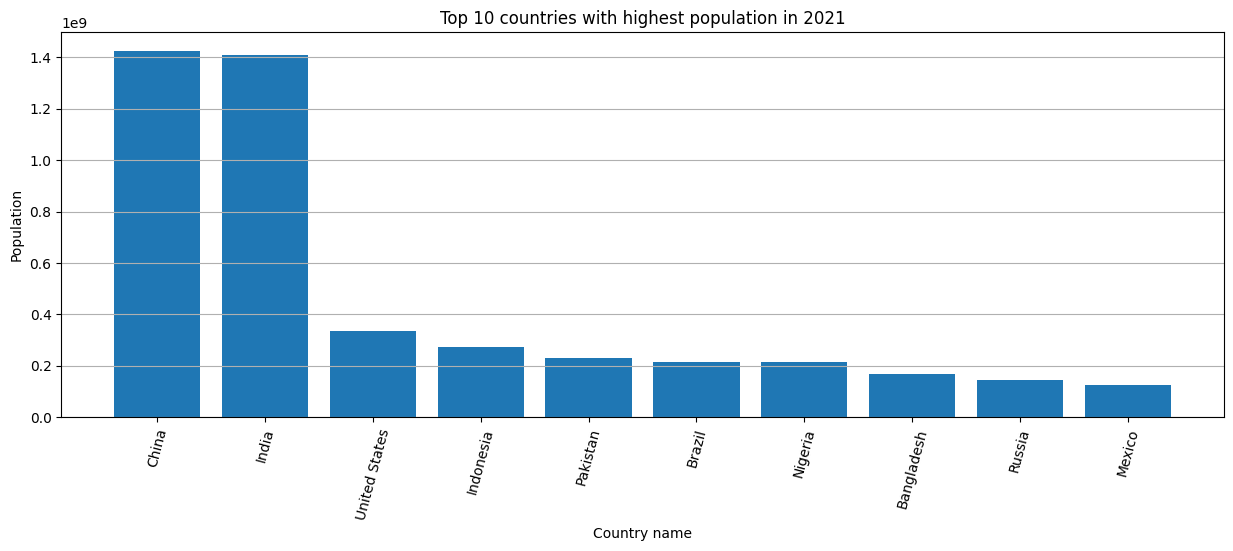

In [ ]:
fig, ax = plt.subplots()
x3 = top10_population.index
y3 = top10_population["Population"]

ax.bar(x3, y3)

plt.xlabel("Country name")
plt.ylabel("Population")
plt.title("Top 10 countries with highest population in 2021")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()

### **4. Global CO2 emissions per country**

---



In [ ]:
df4 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/annual-co-emissions-by-region.csv")

In [ ]:
display(df4)
df4.rename(columns= {"Annual CO₂ emissions":"CO₂"}, inplace=True)
df4.drop(columns = "Code", inplace=True)
df4.set_index("Entity",inplace=True)

In [ ]:
df4_unique = df4.index.unique()
display(len(df4_unique)) # we have 258 unique 'country' names but some of them aren't countries, I remove these rows in next step
display(list(df4_unique))


In [ ]:
# Removing no countries:
df4_drop = ['Africa','Africa (GCP)','Asia','Asia (GCP)','Asia (excl. China and India)','Europe','Europe (GCP)','Europe (excl. EU-27)',
 'Europe (excl. EU-28)','European Union (27)','European Union (27) (GCP)','European Union (28)','Central America (GCP)','French Equatorial Africa (GCP)',
 'French West Africa (GCP)','High-income countries','International transport','Kuwaiti Oil Fires (GCP)','Low-income countries','Lower-middle-income countries',
 'Middle East (GCP)','Non-OECD (GCP)','North America','North America (GCP)','North America (excl. USA)','OECD (GCP)','Oceania','Oceania (GCP)','South America',
 'South America (GCP)','Upper-middle-income countries','World']
df4.drop( index = df4_drop, axis=0, inplace=True)

In [ ]:
df4_unique = df4.index.unique()
display(len(df4_unique)) # we have 226 unique country names left
display(list(df4_unique))

In [ ]:
Co2 = pd.pivot_table(df4, values="CO₂", index=["Entity"], columns=["Year"]) # this creates some missing values
list(Co2.isna().sum())# there are many data missing for certain years for many countries. These are 207-100 records per year missing,mostly from 18th and 19th century.
# I will analyze data of most recent 20 years as there are most avaiable data in those years so we can compare as many countries as possible.

In [ ]:
Co2_last20 = Co2.loc[:,2000:2021]
#list(Co2_last20.isna().sum())
Co2_top20 = pd.DataFrame(Co2_last20.copy())
Co2_top20.sort_values(by=2020, ascending=False, inplace=True)

In [ ]:
Co2_top20.dropna(how="all", inplace=True) # dropping rows with all mising data

In [ ]:
pd.options.display.float_format = '{0:,.0f}'.format # changing format for better overview
Co2_top20.head(20)

In [ ]:
CO2_graph = Co2_top20.head(10)

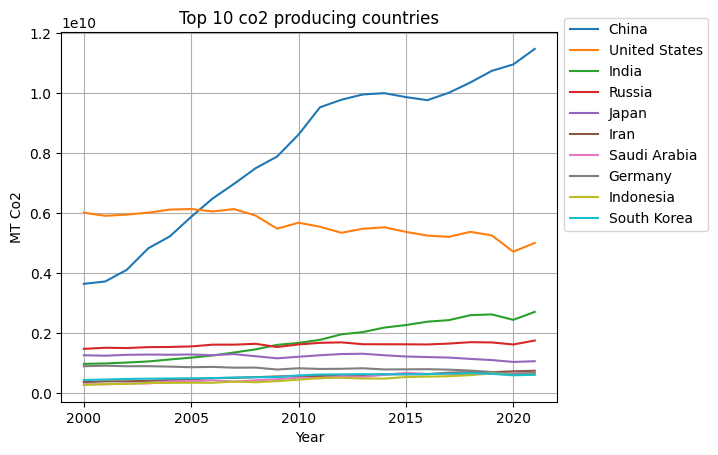

In [ ]:
fig, ax = plt.subplots()
years = Co2_top20.columns


for index, row in CO2_graph.iterrows():
    plt.plot(years, row, label = index)

plt.title("Top 10 co2 producing countries")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()

plt.show()

### **5. Looking at biggest changers (where the CO2 output per capita increased most)**

---



In [ ]:
consumption_capita

In [ ]:
# I look for countries with biggest grow of co2 emissions. For this reason I compare first and last year of datatable and calculate absolute and relative change.
# Then I sort the values by relative change
cons_co2change= consumption_capita.loc[:,1990:2020].copy()
cons_co2change["Absolute_change"] = cons_co2change[2020] - cons_co2change[1990]
cons_co2change["Relative_change"] = ((cons_co2change[2020]-cons_co2change[1990])/cons_co2change[1990])*100

In [ ]:
#cons_biggest_changers = cons_co2change.sort_values(by="Absolute_change", ascending=False)
#cons_biggest_changers = cons_co2change.sort_values(by="Relative_change", ascending=False) - this doesn't work for me as we have countries with total small emission on the top
cons_biggest_changers = cons_co2change.sort_values(by=[2020,"Relative_change"], ascending=False) # now sorted by bigger emissions first

In [ ]:
cons_biggest_changers.head(20)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,Absolute_change,Relative_change
Entity,,,,,,,,,,,,,,,,,,,,,
Qatar,24.284792,34.715115,48.981020,55.249120,53.507206,54.294370,53.607628,56.140694,47.745277,26.492987,...,23.209417,25.699507,27.996979,27.517940,26.760230,24.682365,26.334131,25.771225,1.486433,6.120839
Singapore,23.548970,23.733261,26.054739,25.415323,26.628195,25.424208,27.796630,29.750970,24.475218,25.620447,...,47.780800,34.106182,29.141739,26.334953,27.118458,28.111553,27.263130,24.238316,0.689346,2.927287
Brunei,16.566265,14.566267,15.296406,15.887406,16.189764,15.496243,17.173124,11.808774,16.045220,9.407919,...,20.824152,20.884491,17.907670,16.576061,19.521997,21.589138,22.479622,22.549650,5.983385,36.117888
Kuwait,23.354385,16.789038,20.770582,29.152718,32.144455,31.375050,25.641815,27.164867,29.333479,23.267149,...,21.058798,20.120173,24.519283,25.081854,22.742481,22.300253,23.189604,22.231573,-1.122812,-4.807714
United Arab Emirates,29.460331,30.569416,30.151358,31.258730,33.363770,31.779165,30.904170,29.390745,31.881128,25.778944,...,27.118061,26.936176,27.123022,26.822754,23.982332,23.592640,21.358898,19.848060,-9.612271,-32.627845
Saudi Arabia,12.099707,15.772079,16.625803,17.577585,16.497288,12.998863,12.504362,10.308723,10.633352,8.890874,...,17.067740,18.990238,21.378126,19.407518,18.507671,17.182861,17.760344,18.277689,6.177982,51.058939
Trinidad and Tobago,9.274585,9.729356,10.877162,9.930272,9.403811,8.538855,10.935019,11.265952,11.464966,10.455036,...,10.345596,13.272909,15.683864,18.976198,16.396156,15.269826,17.099870,17.252722,7.978137,86.021499
Malta,9.216151,8.735246,9.315059,9.909511,9.613604,9.685869,9.992473,9.231171,12.073519,10.550646,...,14.805205,17.047338,18.445890,19.815607,18.458887,21.140186,19.614109,16.612299,7.396148,80.252027
United States,20.347502,19.725270,20.175217,20.126003,20.247800,20.217650,20.590729,20.717155,21.054504,21.440773,...,17.982372,18.141993,17.852444,17.309807,17.087513,17.476597,17.027067,15.471116,-4.876386,-23.965527


In [ ]:
cons_biggest_changers.tail(20)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,Absolute_change,Relative_change
Entity,,,,,,,,,,,,,,,,,,,,,
Czechia,14.694859,12.680938,14.385250,12.836936,12.158382,11.991747,11.887266,11.543476,11.129313,10.755303,...,10.363403,9.787417,9.954729,10.063690,10.549394,10.783909,10.359419,9.485199,-5.209660,-35.452263
Cyprus,8.621961,8.656540,10.314106,9.197272,8.989743,9.069553,10.249519,9.148080,10.840272,8.951058,...,5.581785,6.040991,5.649689,5.753269,6.484952,6.480285,6.271140,5.477598,-3.144363,-36.469236
Lithuania,11.455255,12.141571,13.901977,8.606816,7.652970,7.510003,6.154727,5.894873,6.070131,5.478316,...,6.999363,7.163240,6.954968,7.374339,7.777392,8.081667,7.738359,7.196855,-4.258399,-37.174201
Germany,15.016723,14.304148,15.013348,14.365218,13.985097,14.024795,13.792063,13.213906,13.229395,13.339716,...,11.367278,11.070610,10.888890,11.070989,10.887465,10.673265,10.136722,9.234386,-5.782338,-38.505988
Denmark,12.070633,12.760571,13.434437,12.937329,13.215765,13.025332,13.900544,12.782030,12.378810,13.044023,...,9.307298,9.033411,8.669584,8.698065,8.596834,8.713318,8.007111,7.308942,-4.761691,-39.448561
Sweden,10.014597,9.868228,10.844761,10.036679,9.899765,9.744120,10.337374,9.765383,9.933965,9.279281,...,7.698796,7.515774,7.274967,7.169098,7.214167,7.163988,6.707484,5.935962,-4.078635,-40.726901
United Kingdom,11.696713,11.793274,12.046045,11.407504,11.245523,11.144850,11.606233,11.551663,11.925702,11.647475,...,9.648185,9.237608,9.061221,8.765311,8.297335,8.064993,7.699153,6.929182,-4.767531,-40.759583
Romania,7.047411,5.684372,5.267738,4.918006,4.601578,4.680104,4.520937,4.044925,3.963754,3.582095,...,3.966033,4.088350,4.007175,4.128501,4.349770,4.527492,4.376486,4.171222,-2.876189,-40.811998
Jordan,4.647426,3.955552,4.423205,4.028437,4.191559,4.119510,3.265495,3.683091,3.704210,3.434512,...,4.663926,4.159167,3.757792,3.179674,3.068930,2.978948,2.939782,2.667626,-1.979800,-42.599922


### **6. Looking at GDP data and the relation of per capita GDP to CO2 output**

---



  * **Inspecting and cleaning the data set**

---



In [ ]:
df5 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/co2-emissions-and-gdp-per-capita.csv")
# source: https://ourworldindata.org/grapher/co2-emissions-and-gdp-per-capita?tab=table&time=1992..latest&country=~GBR


In [ ]:
pd.options.display.float_format = '{:.2f}'.format # this format will be better here

In [ ]:
display(df5)
df5.set_index("Entity",inplace=True) # setting index

In [ ]:
# Dropping and renaming columns for a better overview
df5.drop(columns="Code", inplace=True)
df5.columns
df5.rename(columns= {"GDP per capita, PPP (constant 2017 international $)":"GDP",
                     "Annual CO₂ emissions (per capita)":"Prod_CO₂",
                     "Annual consumption-based CO₂ emissions (per capita)":"Cons_CO₂"}, inplace=True)
df5.dropna(inplace=True) # dropping rows with empty values

In [ ]:
#dropping rows with "no country" values
df5_unique = df5.index.unique()
display(len(df5_unique)) # we have 124 unique "country-like" names
display(list(df5_unique))

In [ ]:
df5_drop = ['European Union (27)','High-income countries','Low-income countries','Lower-middle-income countries','Upper-middle-income countries','World']
df5.drop(index = df5_drop, axis=0, inplace=True)

In [ ]:
df5_unique = df5.index.unique()
display(len(df5_unique)) # we have 118 unique country names left
display(list(df5_unique))

In [ ]:
df5

* **Lookig at 20 countries with highest and lowest CO2 output per capita per country and its relation to GDP per capita per country according to latest measurments (2020)**

---



In [ ]:
# Top 20 countries
GDP_2020 = df5.loc[df5["Year"]==2020].copy()
GDP_2020.sort_values(by="Cons_CO₂",inplace=True, ascending=False)
GDP_20 = GDP_2020.head(20).copy()
GDP_20.drop(columns="Year", inplace=True)

In [ ]:
# Bottom 20 countries
GDP_20_bottom=GDP_2020.tail(20).copy()
GDP_20_bottom.drop(columns="Year", inplace=True)
GDP_20_bottom

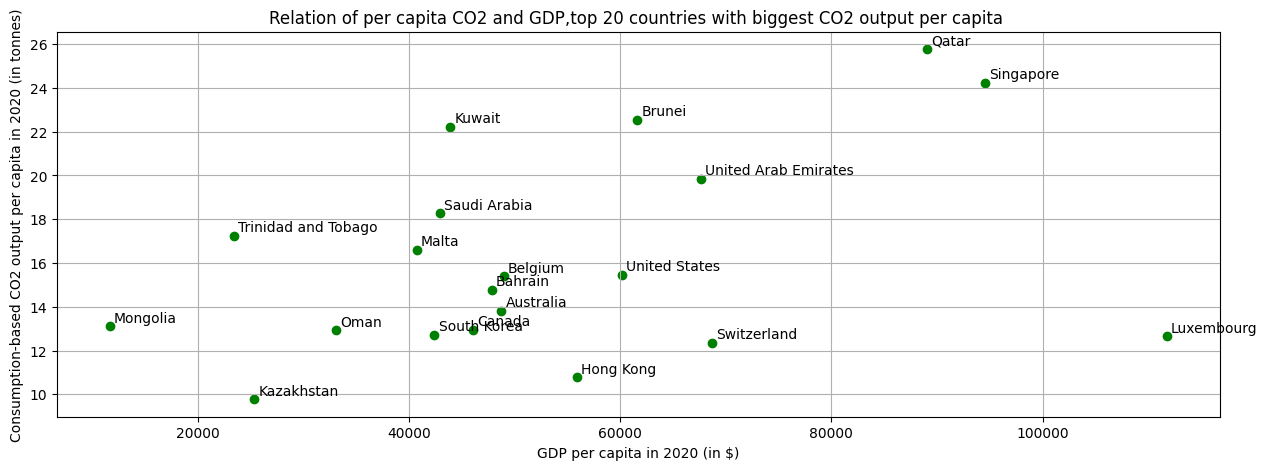

In [ ]:
# Scatterplot of top 20 countries

x5=GDP_20['GDP']
y5=GDP_20['Cons_CO₂']
z5=GDP_20.index
plt.figure(figsize=(15,5))

plt.scatter(x5,y5 , c = "green")
for i, txt in enumerate(z5):
    plt.annotate(txt, (x5[i], y5[i]),xytext=(0.3, 0.3), textcoords='offset fontsize')

plt.xlabel("GDP per capita in 2020 (in $)")
plt.ylabel("Consumption-based CO2 output per capita in 2020 (in tonnes)")
plt.title("Relation of per capita CO2 and GDP,top 20 countries with biggest CO2 output per capita ")
plt.grid()


plt.show()

In [ ]:
# Scatterplot of bottom 20 countries

x5b=GDP_20_bottom['GDP']
y5b=GDP_20_bottom['Cons_CO₂']
z5b=GDP_20_bottom.index
plt.figure(figsize=(15,5))

plt.scatter(x5b,y5b , c = "green")
for i, txt in enumerate(z5b):
    plt.annotate(txt, (x5b[i], y5b[i]), xytext=(0.3, -1), textcoords='offset fontsize')

plt.xlabel("GDP per capita (in $)")
plt.ylabel("Consumption-based CO2 output per capita (in tonnes)")
plt.title("Relation of per capita CO2 and GDP among countries with lowest CO2 output per capita in 2020")
plt.grid()

plt.show()

* **Calculating corelation with Pandas function and looking at top and bottom 3 countries with highest and lowest correlation coefficient**


---



In [ ]:
# Checking correlation with pandas function

pd.options.display.float_format = '{:.2f}'.format
df5.set_index("Entity",inplace=True)
GDP_corelation = df5.groupby(["Entity"])
GDP_c = GDP_corelation.corr(numeric_only = True)
GDP_c2=GDP_c.loc[(GDP_c["Prod_CO₂"] !=1) & (GDP_c["Cons_CO₂"] != 1)].copy()
GDP_c2.drop(columns=["GDP"], inplace=True)
GDP_c2.sort_values(by="Cons_CO₂" , ascending=False, inplace=True)
GDP_c2.drop(columns=["Year"], inplace=True)
display(GDP_c2.head(20)) # India,Vietnam,Cambodia
display(GDP_c2.tail(25)) # Germany, Sweden, Bahrain

In [ ]:
df5

In [ ]:
def plot_changes (df,country):
        df = df.loc[df.index == country].copy()
        df.set_index("Year", inplace=True)
        df["devGDP"] = (df["GDP"]/(df.loc[1990,"GDP"]))*100
        df["devProd_CO₂"] = (df["Prod_CO₂"]/(df.loc[1990,"Prod_CO₂"]))*100
        df["devCons_CO₂"] = (df["Cons_CO₂"]/(df.loc[1990,"Cons_CO₂"]))*100
        df.fillna(0)
        years = df.index
        GDP = df["devGDP"]
        CCO2 = df["devProd_CO₂"]
        PCO2 = df["devCons_CO₂"]

        plt.plot(years,GDP, label="GDP per capita")
        plt.plot(years,CCO2, label="Consumption-based CO2 per capita")
        plt.plot(years,PCO2, label="Production-based CO2 per capita")
        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita GDP and CO2 emissions in {country} during years 1990-2020")
        plt.grid()
        plt.show()

def plot_changes_1993 (df,country):
        df = df.loc[df.index == country].copy()
        df.set_index("Year", inplace=True)
        df["devGDP"] = (df["GDP"]/(df.loc[1993,"GDP"]))*100
        df["devProd_CO₂"] = (df["Prod_CO₂"]/(df.loc[1993,"Prod_CO₂"]))*100
        df["devCons_CO₂"] = (df["Cons_CO₂"]/(df.loc[1993,"Cons_CO₂"]))*100
        df.fillna(0)
        years = df.index
        GDP = df["devGDP"]
        CCO2 = df["devProd_CO₂"]
        PCO2 = df["devCons_CO₂"]

        plt.plot(years,GDP, label="GDP per capita")
        plt.plot(years,CCO2, label="Consumption-based CO2 per capita")
        plt.plot(years,PCO2, label="Production-based CO2 per capita")
        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita GDP and CO2 emissions in {country} during years 1990-2020")
        plt.grid()
        plt.show()


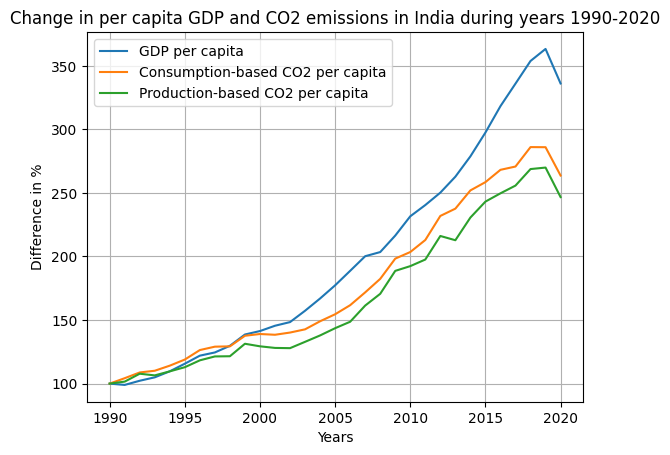

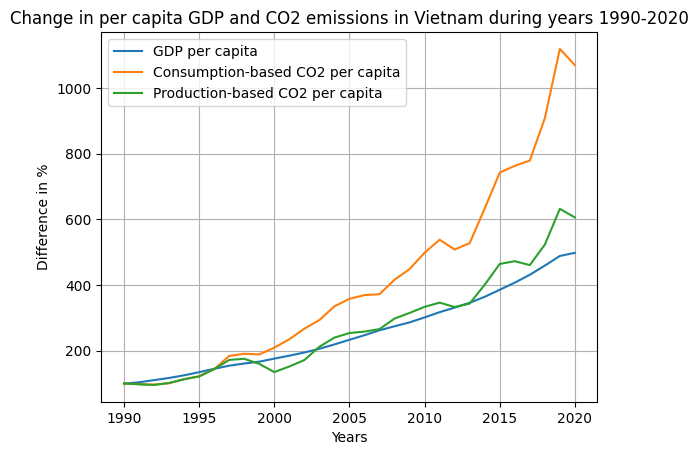

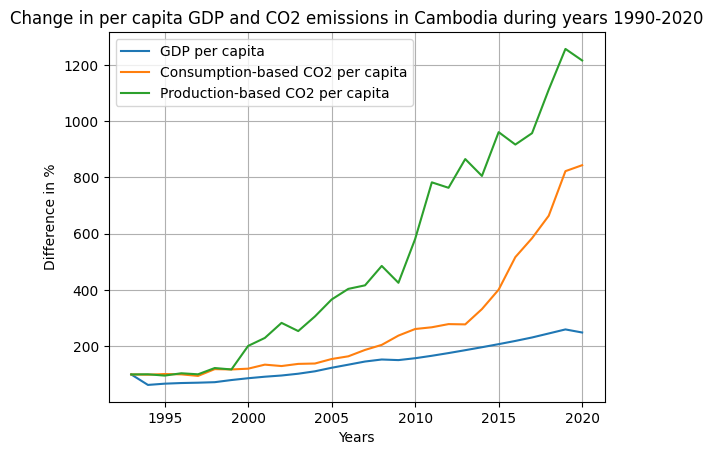

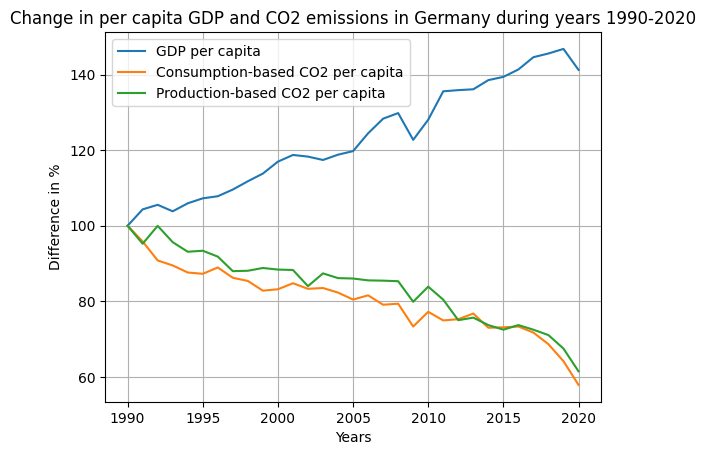

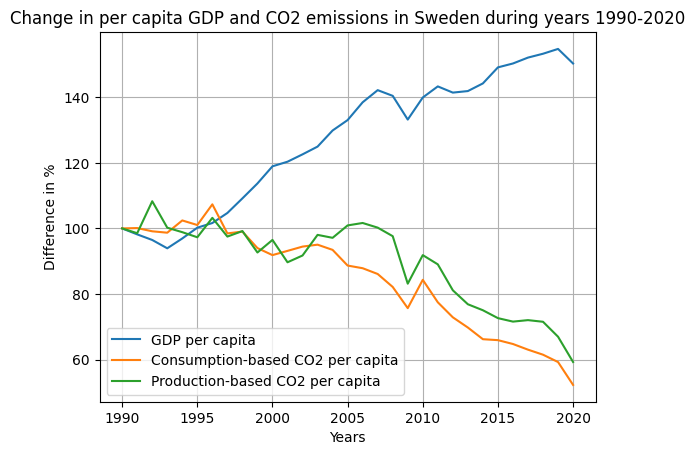

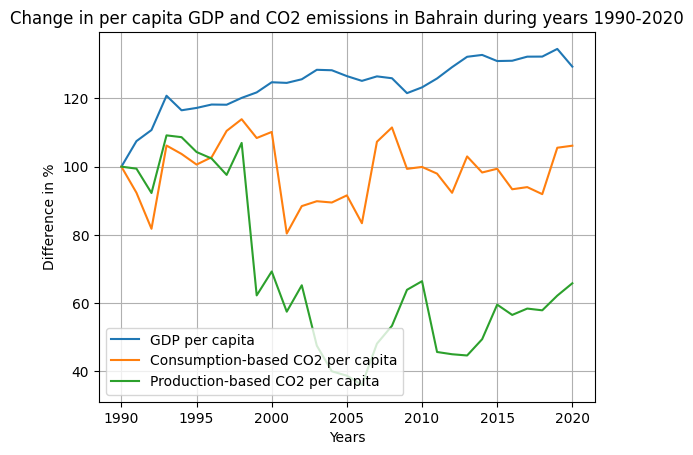

In [ ]:
plot_changes(df5,"India")
plot_changes(df5,"Vietnam")
plot_changes_1993(df5,"Cambodia") # only data from 1993 available
plot_changes(df5,"Germany")
plot_changes(df5,"Sweden")
plot_changes(df5,"Bahrain")

* **Looking at GPD per capita change**

---



In [ ]:
df5_GDP = df5.loc[:,["Year","GDP"]]
GDP = pd.pivot_table(df5_GDP, values=["GDP"], index=["Entity"], columns=["Year"])
GDP["absolute_dev"] = GDP[('GDP', 2020)]-GDP[('GDP', 1990)]
GDP["relative_dev"] = (GDP[('GDP', 2020)]/GDP[('GDP', 1990)]-1)*100
#GDP.columns
#display(GDP)
GDP.dropna(inplace=True) # dropping rows with empty values, there are too many missing values for some of the countries

In [ ]:
GDP_capita = GDP.sort_values(by=('GDP', 2020), ascending=False) # countries sorted per GDP per capita in 2020
GDP_absolutechange = GDP.sort_values(by=('absolute_dev'), ascending=False) # countries sorted per GDP absolute change
GDP_relchange = GDP.sort_values(by=('relative_dev'), ascending=False) # countries sorted per GDP relative change

In [ ]:
print('*** Highest and lowest GDP per capita per country in 2020 ***')
print("\n Top 10")
display(GDP_capita.head(10))
print("Bottom 10")
display(GDP_capita.tail(10))
print('\n')
print("*** Highest and lowest GDP per capita absolute change in years 1990-2020 ***")
print("\n Top 10")
display(GDP_absolutechange.head(10))
print("Bottom 10")
display(GDP_absolutechange.tail(10))
print('\n')
print("*** Highest and lowest GDP per capita relative change (in %). Years 1990-2020 ***")
print("\n Top 10")
display(GDP_relchange.head(10))
print("Bottom 10")
display(GDP_relchange.tail(10))

* **Looking at per capita GDP and CO2 change over the time and its relation to each other. Analyse on a sample of few countries.**

---



In [ ]:
df5
#df5_2 = pd.pivot_table(df5, values=["GDP","Prod_CO₂","Cons_CO₂",], index=["Entity"], columns=["Year"])
# Based on previous analysis in this notebook(above) I want to take a closer look on these countries:
  # China - biggest CO2 output in total and increasing substantially over last 2 decades
  # United States - second biggest CO2 output in total but decreasing over last decade
  # Luxembourg -lowered CO2 output per capita with almost 60% over last 3 decades and has highest GDP per capita
  # Qatar - biggest CO2 output per capita
  # Madagascar -one of the lowest per capita both: CO2 and GDP
  # Zimbabwe- outlier on per capita CO2 and GDP relation
  # United Arab Emirates

In [ ]:
def plot_changes (df,country):
        df = df.loc[df.index == country].copy()
        df.set_index("Year", inplace=True)
        df["devGDP"] = (df["GDP"]/(df.loc[1990,"GDP"]))*100
        df["devProd_CO₂"] = (df["Prod_CO₂"]/(df.loc[1990,"Prod_CO₂"]))*100
        df["devCons_CO₂"] = (df["Cons_CO₂"]/(df.loc[1990,"Cons_CO₂"]))*100
        df.fillna(0)
        years = df.index
        GDP = df["devGDP"]
        CCO2 = df["devProd_CO₂"]
        PCO2 = df["devCons_CO₂"]

        plt.plot(years,GDP, label="GDP per capita")
        plt.plot(years,CCO2, label="Consumption-based CO2 per capita")
        plt.plot(years,PCO2, label="Production-based CO2 per capita")
        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita GDP and CO2 emissions in {country} during years 1990-2020")
        plt.grid()
        plt.show()

# as Qatar is missing some data before 2000 I adjust the year:
def plot_changes_2000 (df,country):
        df = df.loc[df.index == country].copy()
        df.set_index("Year", inplace=True)
        df["devGDP"] = (df["GDP"]/(df.loc[2000,"GDP"]))*100
        df["devProd_CO₂"] = (df["Prod_CO₂"]/(df.loc[2000,"Prod_CO₂"]))*100
        df["devCons_CO₂"] = (df["Cons_CO₂"]/(df.loc[2000,"Cons_CO₂"]))*100
        df.fillna(0)
        years = df.index
        GDP = df["devGDP"]
        CCO2 = df["devProd_CO₂"]
        PCO2 = df["devCons_CO₂"]

        plt.plot(years,GDP, label="GDP per capita")
        plt.plot(years,CCO2, label="Consumption-based CO2 per capita")
        plt.plot(years,PCO2, label="Production-based CO2 per capita")
        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita GDP and CO2 emissions in {country} during years 1990-2020")
        plt.grid()
        plt.show()

In [ ]:
plot_changes(df5,"China")
plot_changes(df5,"United States")
plot_changes(df5,"Luxembourg")
plot_changes(df5,"Madagascar")
plot_changes(df5,"Zimbabwe")
plot_changes_2000(df5,"Qatar")
plot_changes(df5,"United Arab Emirates")

NameError: ignored

###  **7. Access to clean fuels for cooking vs GDP per capita and CO2 output per capita**

**Inspecting and cleaning up data base**

---



In [ ]:
df6 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/access-to-clean-fuels-for-cooking-vs-gdp-per-capita.csv")
#Looking on the data
#df6
#df6.columns

In [ ]:
#Reindexing, dropping and renaming some columns
df6.set_index("Entity", inplace=True)
df6.drop(columns=["Code","Continent"], inplace=True)
df6.rename(columns={"Indicator:Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence Area Type:Total":
                    "Clean_fuels_indicator","GDP per capita, PPP (constant 2017 international $)":"GDP","Population (historical estimates)":"Population"},inplace=True)
df6.dropna(inplace=True)

In [ ]:
# Looking at countries names
df6unique = df6.index.unique()
display(len(df6unique)) # we have 181 unique 'country' names
display(list(df6unique)) #they all seem correct, except "World" but i leave it for now as it is

In [ ]:
df6a = pd.merge(df6, df1, how='left', on=['Entity', 'Year'])
df6a.drop(columns="Population", inplace=True)
df6a.dropna(inplace=True)

In [ ]:
df6_2020=df6a.loc[df6a["Year"]==2020].copy()
df6_2020.sort_values(by="Clean_fuels_indicator", ascending=False, inplace=True)
clean_fuels_top20 = df6_2020.head(20)
clean_fuels_end20 = df6_2020.tail(20)
display(clean_fuels_top20)
#display(clean_fuels_end20)

In [ ]:
plt.figure(figsize=(15,5))

plt.scatter(df6_2020["GDP"],df6_2020['Clean_fuels_indicator'])
plt.xlabel("GDP per capita in 2020 (in $)")
plt.ylabel("Clean fuels indicator - % of population with access to clean fuels")
plt.title("Relation of access to the clean fuels for cooking and GDP year 2020")
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.scatter(df6_2020["GDP"],df6_2020['Clean_fuels_indicator'])
plt.xlabel("GDP per capita in 2020 (in $)")
plt.ylabel("Clean fuels indicator - % of population with access to clean fuels")
plt.title("Relation of access to the clean fuels for cooking and GDP year 2020")
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.scatter(df6_2020["Annual CO₂"],df6_2020['Clean_fuels_indicator'])
plt.xlabel("Co2 per capita in 2020 (in tons per year)")
plt.ylabel("Clean fuels indicator - % of population with access to clean fuels")
plt.title("Relation of access to the clean fuels for cooking and CO2 per capita of a country in 2020")
plt.grid()

plt.show()

### **8. Energy use per capita**

**Inspecting and cleaning up data frame**

---



In [ ]:
df8 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/per-capita-energy-use.csv")
df8.drop(columns="Code", inplace=True)
df8.rename(columns={"Primary energy consumption per capita (kWh/person)":"Energy"},inplace=True)
df8.set_index("Entity",inplace=True)
df8

In [ ]:
df8unique = df8.index.unique()
display(len(df8unique)) # we have 234 unique 'country' names
display(list(df8unique))

In [ ]:
remove= ['Africa','Asia','Europe','European Union (27)','High-income countries','Low-income countries','Lower-middle-income countries','North America','Oceania',
         'South America','Upper-middle-income countries','World']
df8.drop(index = remove, axis=0, inplace=True)
# we have 222 unique country names left

**Merging data frames**

---



In [ ]:
df8_2 = pd.merge(df8, df5, how='left', on=['Entity', 'Year'])
df8_2.dropna(inplace=True)
Energy = df8_2.loc[df8_2["Year"]==2020].copy()
Energy2020 = Energy.sort_values(by="Energy", ascending =False, inplace=True)
energy_top = Energy.head(20) #getting top 20 energy consumers
energy_tail =Energy.tail(20) # getting bottom 20 energy consumers
energy_top.columns

**Plotting data**

---



* **Relation of per capita energy consumption and CO2 output**

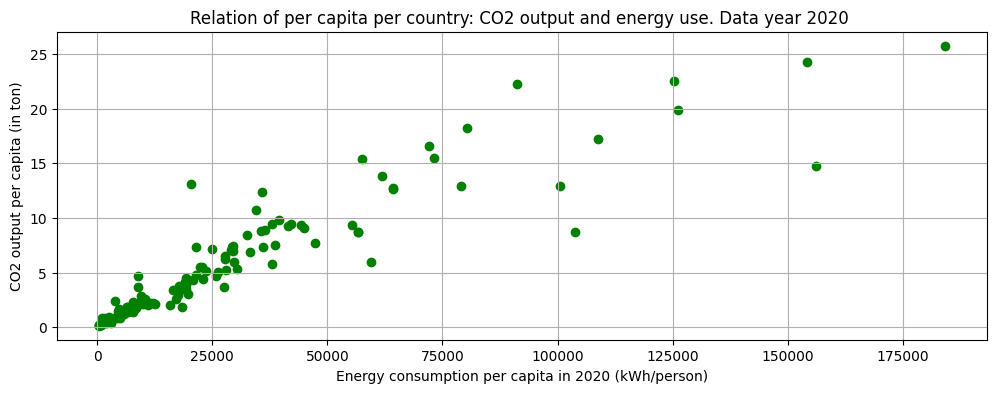

In [ ]:
x8=Energy['Energy']
y8=Energy['Cons_CO₂']

plt.figure(figsize=(12,4))

plt.scatter(x8,y8 , c = "green")

plt.xlabel("Energy consumption per capita in 2020 (kWh/person)")
plt.ylabel("CO2 output per capita (in ton)")
plt.title("Relation of per capita per country: CO2 output and energy use. Data year 2020 ")
plt.grid()
plt.show()

* **Top 20 energy consumers in relation to CO2 output per capita**

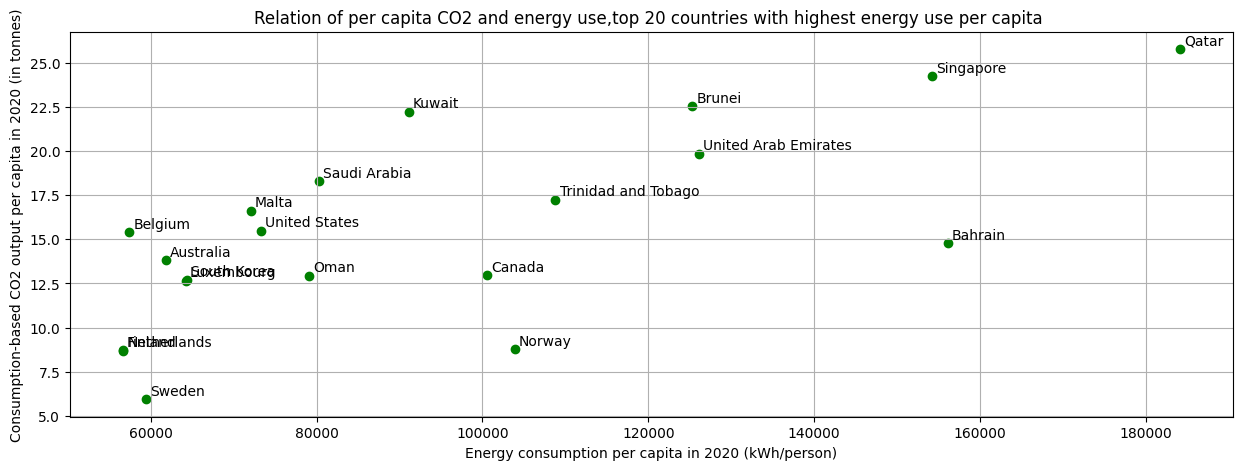

In [ ]:
x8=energy_top['Energy']
y8=energy_top['Cons_CO₂']
z8=energy_top.index
plt.figure(figsize=(15,5))

plt.scatter(x8,y8 , c = "green")
for i, txt in enumerate(z8):
    plt.annotate(txt, (x8[i], y8[i]),xytext=(0.3, 0.3), textcoords='offset fontsize')

plt.xlabel("Energy consumption per capita in 2020 (kWh/person)")
plt.ylabel("Consumption-based CO2 output per capita in 2020 (in tonnes)")
plt.title("Relation of per capita CO2 and energy use,top 20 countries with highest energy use per capita ")
plt.grid()
plt.show()

* **Bottom 20 energy consumers in relation to CO2 output per capita**

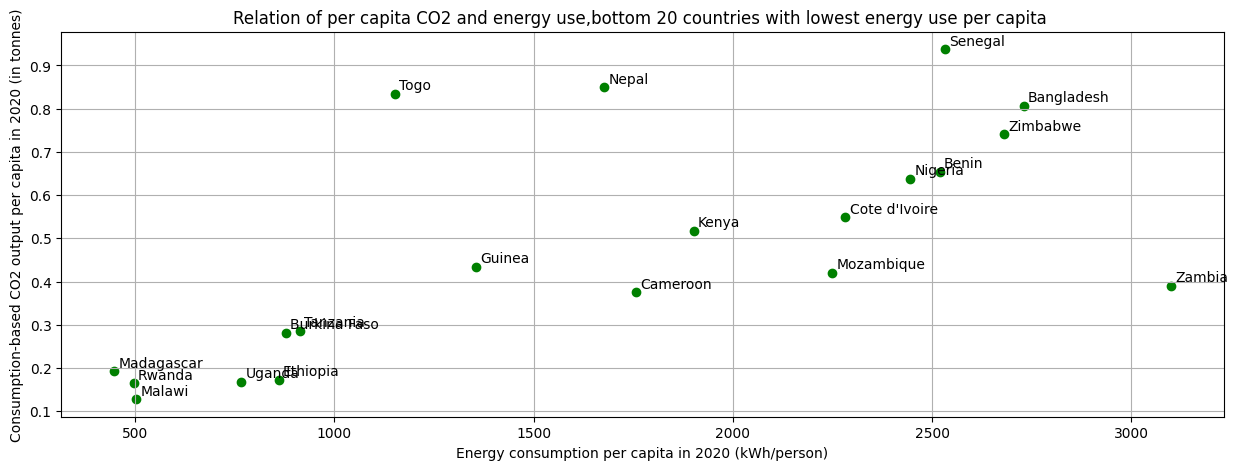

In [ ]:
x8=energy_tail['Energy']
y8=energy_tail['Cons_CO₂']
z8=energy_tail.index
plt.figure(figsize=(15,5))

plt.scatter(x8,y8 , c = "green")
for i, txt in enumerate(z8):
    plt.annotate(txt, (x8[i], y8[i]),xytext=(0.3, 0.3), textcoords='offset fontsize')

plt.xlabel("Energy consumption per capita in 2020 (kWh/person)")
plt.ylabel("Consumption-based CO2 output per capita in 2020 (in tonnes)")
plt.title("Relation of per capita CO2 and energy use,bottom 20 countries with lowest energy use per capita ")
plt.grid()
plt.show()

### **9. Fossil energy consumption per capita**

**Inspecting and cleaning data frame**

---



In [ ]:
#data source: https://ourworldindata.org/grapher/co-emissions-per-capita-vs-fossil-fuel-consumption-per-capita?tab=table&time=2018
#Fossil fuel consumption is measured as the average consumption of energy from coal, oil and gas per
#person. Emissions include fossil fuel and industry emissions. Land use change is not included.

df9 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/co-emissions-per-capita-vs-fossil-fuel-consumption-per-capita.csv")
display(df9)
df9.columns

In [ ]:
# Renaming and dropping columns
df9.drop(columns = ["Code",'Population (historical estimates)','Income classifications (World Bank (2017))'], inplace=True)
df9.rename(columns= {"Annual CO₂ emissions (per capita)":"CO2",'Fossil fuels per capita (kWh)':'Fossil'}, inplace=True)
df9.set_index("Entity",inplace=True) # setting country names as index
df9

In [ ]:
uv9 = df9.index.unique()
display(len(uv9)) # we have 274 unique 'country' names
display(list(uv9)) # not all of these values are actual cuntries, so i remove them from the list

In [ ]:
df9_drop = ['Africa','Africa (UN)','Asia','Asia (UN)','Asia (excl. China and India)','Czechoslovakia','East Germany','Ethiopia (former)',
            'Europe','Europe (UN)','Europe (excl. EU-27)','Europe (excl. EU-28)','European Union (27)','European Union (28)',
            'High-income countries','Latin America and the Caribbean (UN)','Low-income countries','Lower-middle-income countries',
            'North America','North America (excl. USA)','Northern America (UN)','Oceania','Oceania (UN)','South America','Upper-middle-income countries','West Germany','World']
df9.drop(index=df9_drop,axis=0,inplace=True)
# We have 247 countries left

In [ ]:
df9.isnull().sum() # Looks there are quite some missing data. I don't want to manipulate the results so I just drop them.
df9.dropna(inplace=True)

In [ ]:
display(df9)

,Year,CO2,Fossil
Entity,,,
Algeria,1965,0.532137,1910.1324
Algeria,1966,0.667613,2281.9224
Algeria,1967,0.653757,2096.2073
Algeria,1968,0.686093,2174.2285
Algeria,1969,0.834849,2406.9130
...,...,...,...
Vietnam,2017,2.478286,7801.7310
Vietnam,2018,2.889164,9067.5840
Vietnam,2019,3.560416,10585.5810


In [ ]:
df9_2020 = df9.loc[df9["Year"]==2020].copy()
df9_2020 # 74 countries on the list

 **Looking at correlation with Panda's function**

---



In [ ]:
df9_2020.drop(columns="Year", inplace=True)
df9corr=df9_2020.corr(numeric_only = True)
df9corr

**Plotting relation of fossil fuels use to CO2 output**

---



In [ ]:
x9=df9_2020['Fossil']
y9=df9_2020['CO2']
plt.figure(figsize=(12,4))

plt.scatter(x9,y9 , c = "grey")

plt.xlabel("Fossil fuels consumption per capita (kWh/year)")
plt.ylabel("CO₂ emissions per capita (tons/year)")
plt.title("CO2 emissions per capita vs.fossil fuels consumption per capita. Year 2020. ")
plt.grid()


plt.show()

**Lookig at per capita change in fossil energy consumption over the years and if there is a relation in CO2 output**

---



* **First I am looking for the biggest changers in fossil energy consumption**

In [ ]:
df9a=df9.drop(columns="CO2")
df9fossil=pd.pivot_table(df9a, values="Fossil", index=["Entity"], columns=["Year"]) # produces Nan values
df9fossil #  there isquite some data missing for certain years
list(df9fossil.isna().sum()) # there is more data available in the most recent years, so I scale the data frame to last 20 years
df9fossil_last20 = df9fossil.loc[:,2000:2021].copy()
df9fossil_last20 # we have 79 countries left
df9fossil_last20["dev_fossil"] = ((df9fossil_last20[2021]-df9fossil_last20[2000])/df9fossil_last20[2000])*100
df9fossil_last20.sort_values(by="dev_fossil", ascending=False, inplace=True)
df9fossil_last20.dropna(inplace=True)
display(df9fossil_last20.head(10)) # I want to look at Vietnam,China,India
display(df9fossil_last20.tail(10)) # I choose from here: France, Sweden and Denmark for furhter analysis

Based on above I choose 3 of the top 10 and 3 of the bottom 10 changers in energy consumption to analyse further in details how does CO2 output change in relation to it. Countries I choosed: Vietnam,China, India and France,Sweden and Denmark.

* **Now I can plot relation of per capita change in energy consumption over the years and correlation of CO2 output per capita per country. Analysis on examples of 6 countries with biggest increase and drop in fossil energy consumption over the years**

In [ ]:
def energy_changes (df,country):
        df = df.loc[(df.index == country) & (df["Year"] >= 2000)].copy()
        df.set_index("Year", inplace=True)
        df["devCO2"] = (df["CO2"]/(df.loc[2000,"CO2"]))*100
        df["devFossil"] = (df["Fossil"]/(df.loc[2000,"Fossil"]))*100

        df.fillna(0)
        years = df.index
        CO2 = df["devCO2"]
        Foss= df["devFossil"]

        plt.plot(years,CO2, label="CO2 emissions per capita")
        plt.plot(years,Foss, label="Fossil fuels consumption per capita")

        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita fossil fuels consumption and CO2 emissions in {country} during years 2000-2020")
        plt.grid()
        plt.show()

*** Countries with one of the biggest increases in fossil energy consumption ***



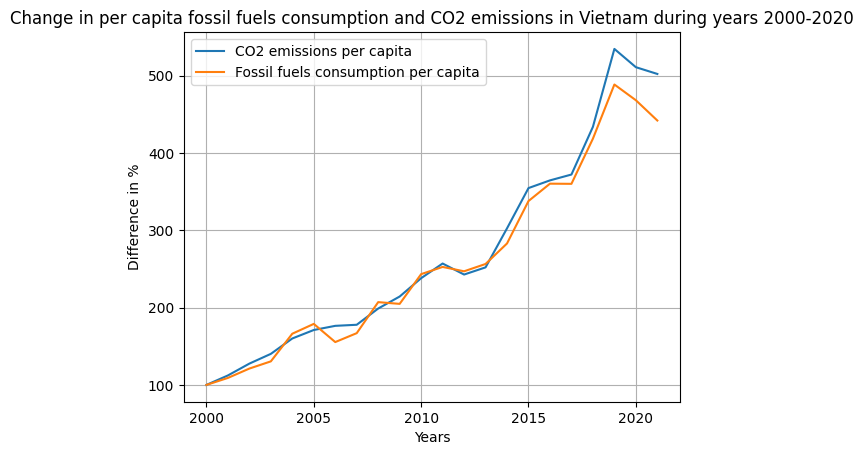

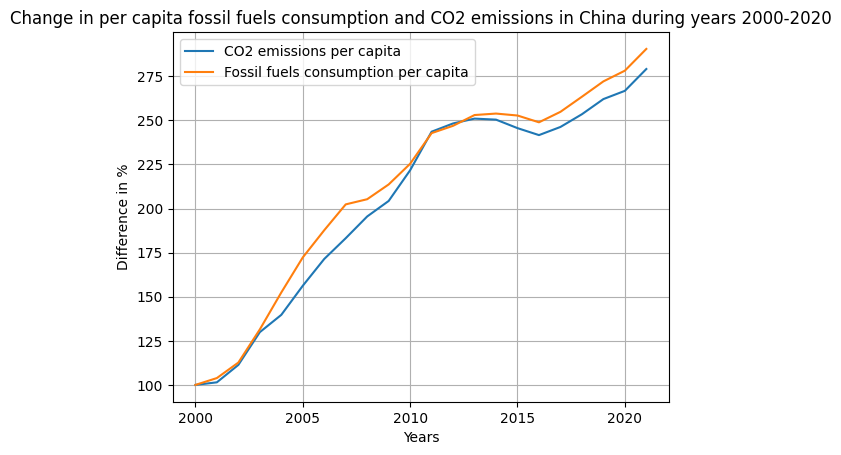

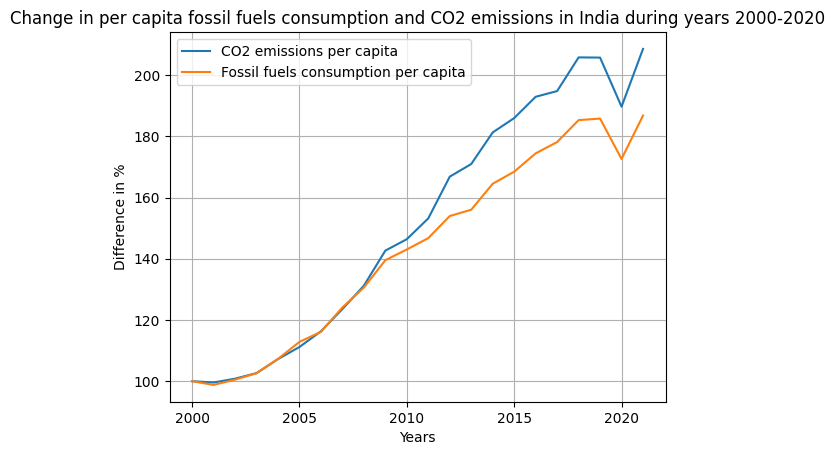


 *** Countries with one of the biggest decreases in fossil energy consumption ***



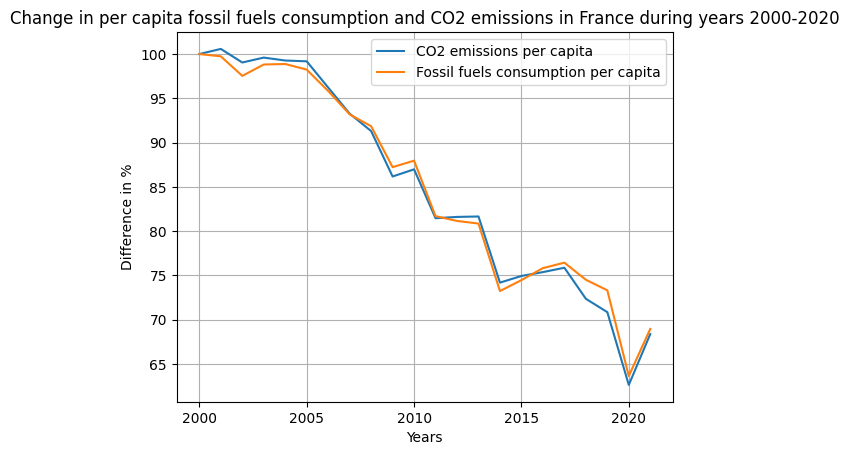

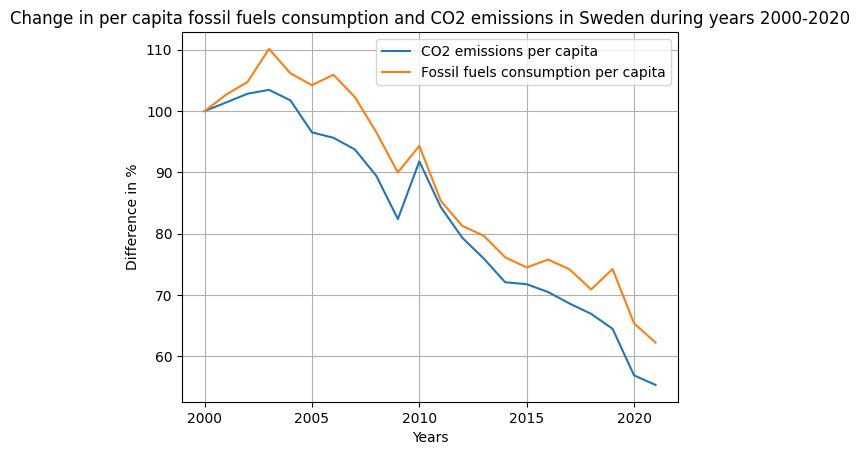

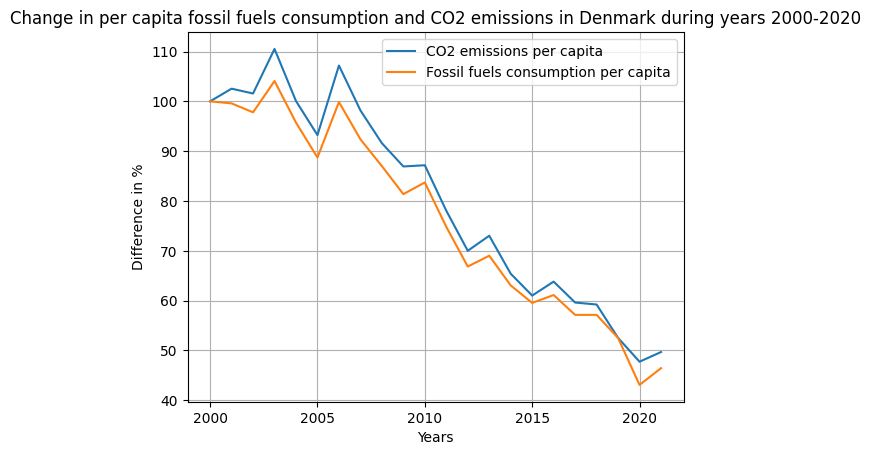

In [ ]:
print("*** Countries with one of the biggest increases in fossil energy consumption ***\n")
energy_changes(df9,"Vietnam")
energy_changes(df9,"China")
energy_changes(df9,"India")
print("\n *** Countries with one of the biggest decreases in fossil energy consumption ***\n")
energy_changes(df9,"France")
energy_changes(df9,"Sweden")
energy_changes(df9,"Denmark")

### **10. Renewables energy consumption per capita**

**Inspecting and cleaning data frame**

---



In [ ]:
#source: https://ourworldindata.org/grapher/per-capita-low-carbon-vs-gdp
df10 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/per-capita-low-carbon-vs-gdp.csv")
df10

In [ ]:
df10.drop(columns=["Code","Continent"], inplace=True)
df10.rename(columns={"Low-carbon energy per capita (kWh - equivalent)":"Low_carbon","GDP per capita, PPP (constant 2017 international $)":"GDP"}, inplace=True)
df10.set_index("Entity",inplace=True)
df10.dropna(inplace=True)
df10

In [ ]:
#Looking at unique values
uv10 = df10.index.unique()
display(len(uv10)) # we have 81 unique 'country' names
display(list(uv10)) # not all of these values are actual cuntries, so I'll remove them from the list

In [ ]:
df10_drop = ['European Union (27)','High-income countries','Lower-middle-income countries','Upper-middle-income countries','World']
df10.drop(index=df10_drop,axis=0,inplace=True)
# We have 76 countries left

In [ ]:
df10.Year.unique() # we have a data from years 1990-2021

**Adding column with CO2 output per capita. I use previous data frame to merge with (with fossil fuels data).**

---



In [ ]:
df10
df10a = pd.merge(df10, df9, how='left', on=['Entity', 'Year'])
df10a.drop(columns="Fossil",inplace=True)

In [ ]:
df10a.isnull().sum() # there are a lot of data missing because another table was much bigger.
#Many countries miss low-carbon data or have no access to low-carbon energy sources. Will have to drop these rows
df10a_check = df10a.sort_values(by="CO2", ascending=True)
df10a_check.tail(90)
df10a.dropna(inplace=True)

In [ ]:
df10_2021 = df10a.loc[df10a["Year"] == 2021].copy()

**Looking at correlation using Pandas function**

---



In [ ]:
df10_2021.drop(columns="Year", inplace=True)
df10corr=df10_2021.corr(numeric_only = True)
df10corr

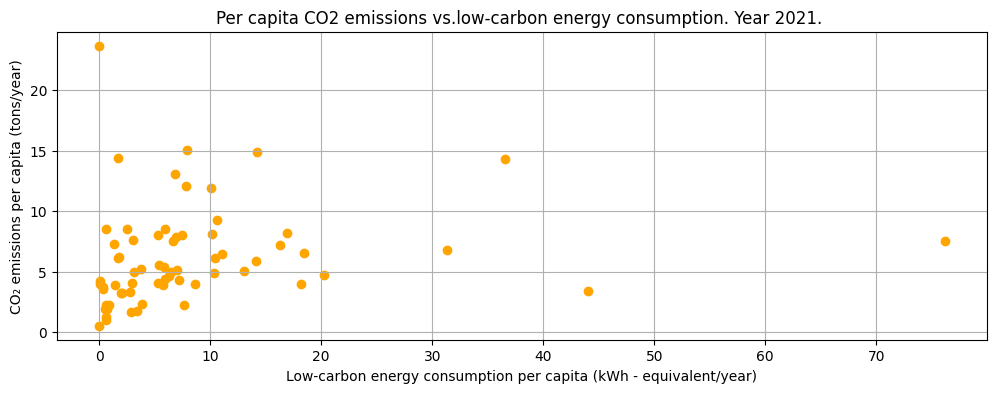

In [ ]:
x10=df10_2021['Low_carbon']
y10=df10_2021['CO2']
plt.figure(figsize=(12,4))

plt.scatter(x10,y10 , c = "orange")

plt.xlabel("Low-carbon energy consumption per capita (kWh - equivalent/year)")
plt.ylabel("CO₂ emissions per capita (tons/year)")
plt.title("Per capita CO2 emissions vs.low-carbon energy consumption. Year 2021. ")
plt.grid()


plt.show()

****

**Looking at countries with biggest and smallest renewables consumption**

---



* **I start with calculating biggest changers in energy consumption.**

---



In [ ]:
df10b=df10a.drop(columns=["CO2","GDP"])
df10ren=pd.pivot_table(df10b, values="Low_carbon", index=["Entity"], columns=["Year"]) # produces Nan values
df10ren #  there isquite some data missing for certain years
list(df10ren.isna().sum()) # there is some data missing in 90's but for now want to look only at 1990 and 2021, so remove only these with null values
df10ren.dropna(subset=[1990, 2021], inplace=True)
df10ren["dev_low_carbon"] = (df10ren[2021]/df10ren[1990])*100
df10ren.sort_values(by=["dev_low_carbon"], ascending=False, inplace=True)
df10ren.sort_values(by=[2021,"dev_low_carbon"], ascending=False, inplace=True) # also checking with sorting by 2021 as I want to get to see the biggest consumers
df10ren
display(df10ren.head(10)) # I want to look at Denmark,Finland,Belgium, China
display(df10ren.tail(10)) # I choose from here: Bangladesh,Uzbekistan,Azerbaijan,Switzerland for furhter analysis

* **Plotting results for biggest changers over the years**

---



In [ ]:
def lowcarbon_changes (df,country):
        df = df.loc[(df.index == country)].copy()
        df.set_index("Year", inplace=True)
        df["devCO2"] = (df["CO2"]/(df.loc[1990,"CO2"]))*100
        df["dev_low_carbon"] = (df["Low_carbon"]/(df.loc[1990,"Low_carbon"]))*100

        df.fillna(0)
        years = df.index
        CO2 = df["devCO2"]
        lowC= df["dev_low_carbon"]

        plt.plot(years,CO2, label="CO2 emissions per capita")
        plt.plot(years,lowC, label="Low-carbon consumption per capita")

        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita low-carbon energy consumption and CO2 emissions in {country} during years 1990-2021")
        plt.grid()
        plt.show()

*** Countries with one of the biggest increases in low-carbon energy consumption ***



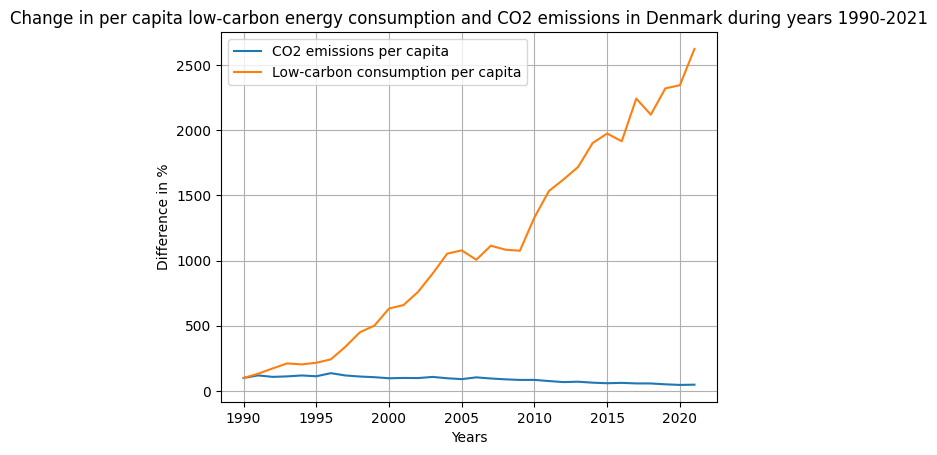

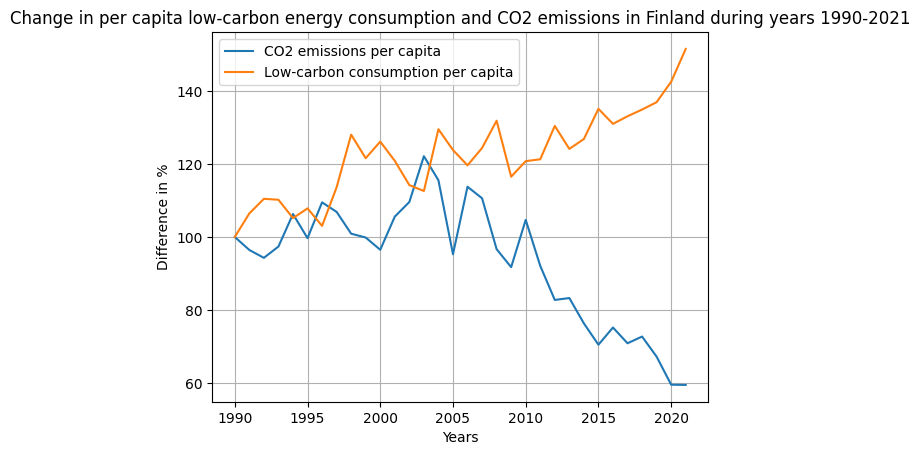

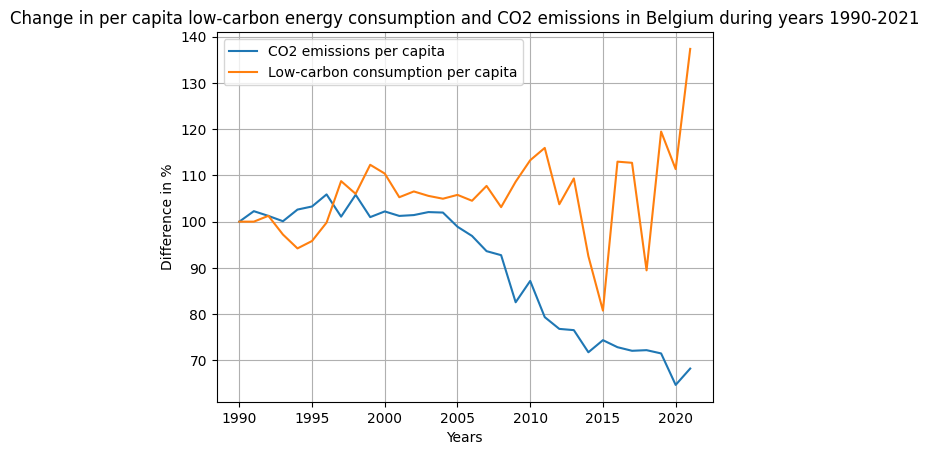

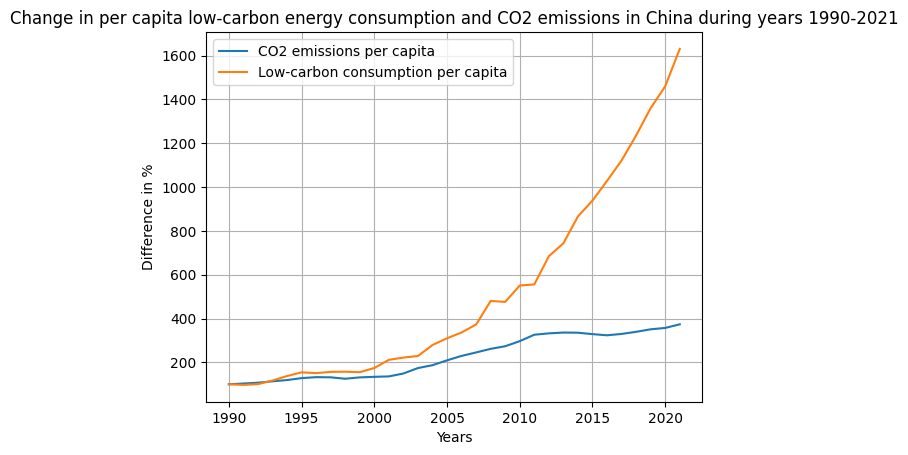


 *** Countries with one of the biggest decreases in low_carbon energy consumption ***



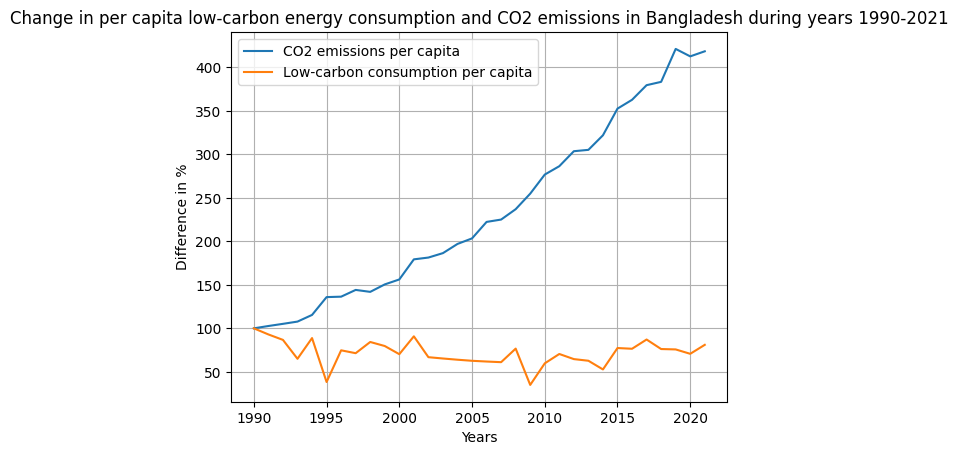

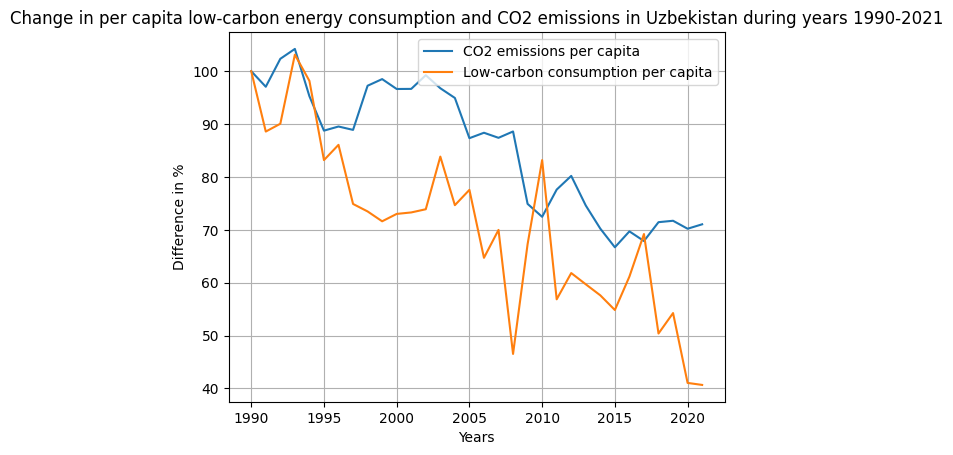

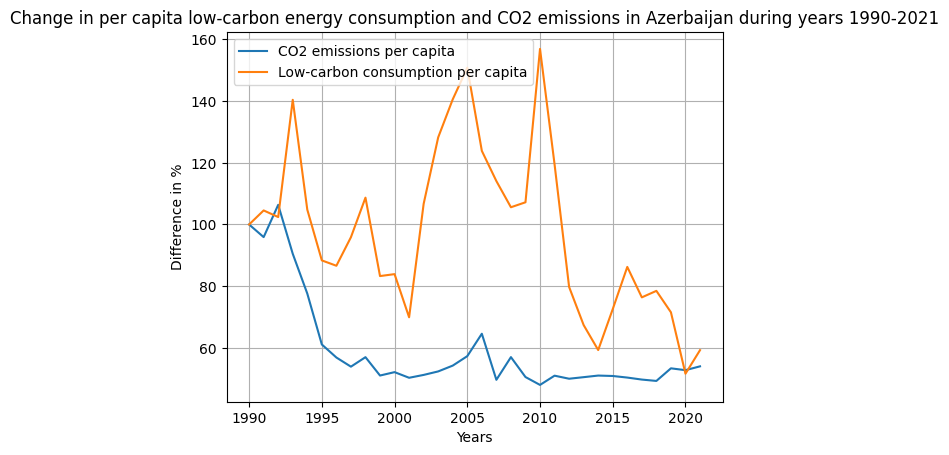

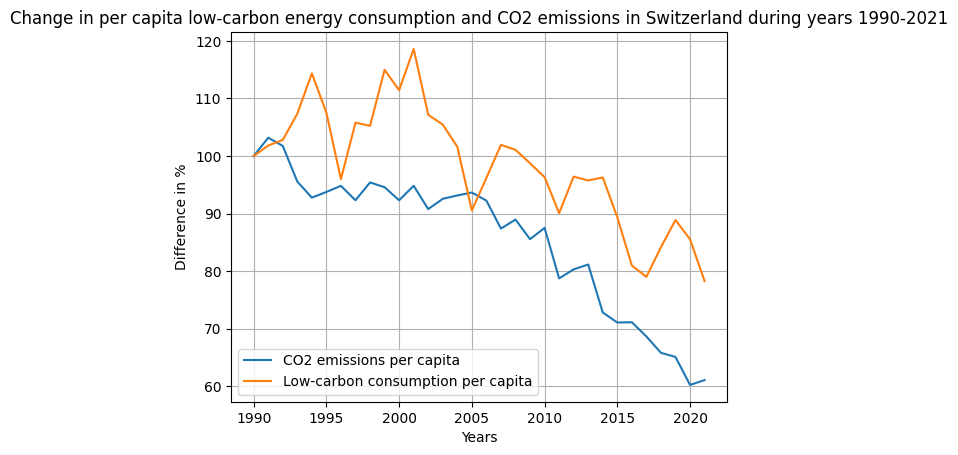

In [ ]:
print("*** Countries with one of the biggest increases in low-carbon energy consumption ***\n")
lowcarbon_changes(df10a,"Denmark")
lowcarbon_changes(df10a,"Finland")
lowcarbon_changes(df10a,"Belgium")
lowcarbon_changes(df10a,"China")

print("\n *** Countries with one of the biggest decreases in low_carbon energy consumption ***\n")
lowcarbon_changes(df10a,"Bangladesh")
lowcarbon_changes(df10a,"Uzbekistan")
lowcarbon_changes(df10a,"Azerbaijan")
lowcarbon_changes(df10a,"Switzerland")

### **Looking at relation of low-carbon energy consumption per capita and GPD per capita**

---



In [ ]:
# I can use previous data frame for this analysis
df10
df11 = df10.loc[df10["Year"]==2021]
df11

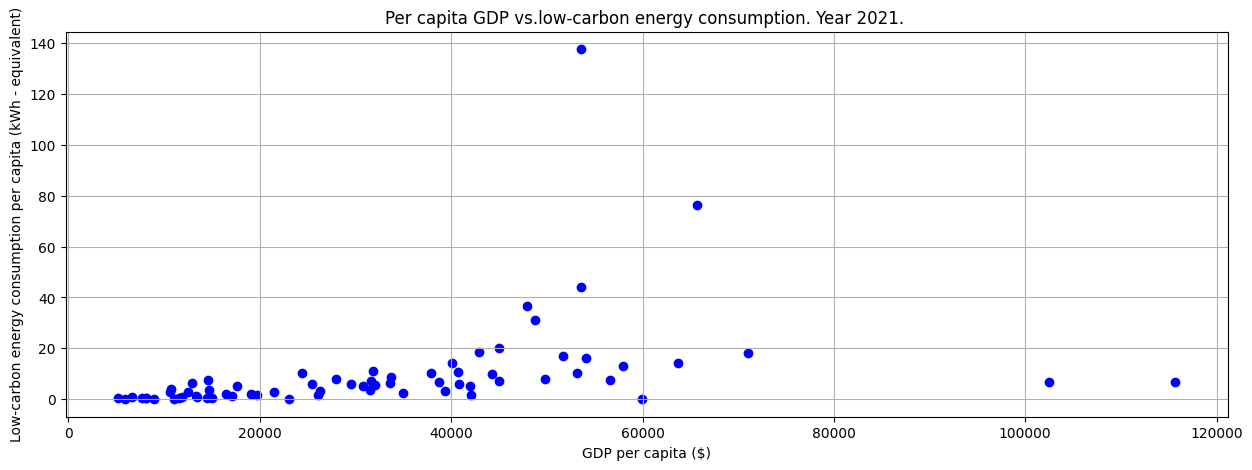

In [ ]:
x11=df11['GDP']
y11=df11['Low_carbon']
plt.figure(figsize=(15,5))

plt.scatter(x11,y11 , c = "blue")

plt.xlabel("GDP per capita ($)")
plt.ylabel("Low-carbon energy consumption per capita (kWh - equivalent)")
plt.title("Per capita GDP vs.low-carbon energy consumption. Year 2021. ")
plt.grid()


plt.show()